Valence represents the positive or negative intensity of an
emotion whereas Arousal indicates how strongly or rhythmically the emotion is felt. 


In this lil study: 
valence is the same
arousal = dancebility (already considers tempo) + energy (both values from 0.0-1.0)

In [1]:
import pandas as pd
import numpy as np
import spotipy
import spotipy.util as util
import simplejson as json
import csv
from ast import literal_eval

#check if i need plyrics3
import pylyrics3
import azlyrics
from azlyrics import lyrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import seaborn as snb

%matplotlib inline

username='112896040'
scope='user-top-read'
token = util.prompt_for_user_token(username,scope,client_id='8d9e21df6c4d41539613ce0a16f87c63',client_secret='7fbf69bc60074033be6d0e34bf11b464',redirect_uri='http://localhost:8888/notebooks/data.ipynb')

if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    #ranges = ['short_term', 'medium_term', 'long_term']
    ranges = ['short_term']
    petitChart = {}
    songNames = []
    songArtists = []
    ids = []
    for rangeTerm in ranges:
        print ("range:", rangeTerm)
        results = sp.current_user_top_tracks(time_range=rangeTerm, limit=50)
        for i, item in enumerate(results['items']):
            ids.append(item['id'])
            songNames.append(item['name'])
            songArtists.append(item['artists'][0]['name'])
            print (i, item['name'], '//', item['artists'][0]['name'])
        print

    petitChart['items']= [{'id': ids, 'songNames' : songNames, 'songArtists': songArtists}]
    
else:
    print("Can't get token for", username)
    
df = pd.DataFrame(petitChart['items'][0])
df.to_csv('small_data.csv', index=False)
info = pd.read_csv('small_data.csv')
#info

range: short_term
0 waves - Tame Impala Remix // Miguel
1 Dance Monkey // Tones and I
2 Enola Gay - Remastered // Orchestral Manoeuvres In The Dark
3 Audacity Of Huge // Simian Mobile Disco
4 Birthday Cake // Rihanna
5 Dani California // Red Hot Chili Peppers
6 Sweetness // Jimmy Eat World
7 Supersonic - Remastered // Oasis
8 Fell In Love With a Girl // The White Stripes
9 Forever // Drake
10 Bat Country // Avenged Sevenfold
11 I Want To Break Free // Queen
12 Redundant // Green Day
13 You Shook Me All Night Long // AC/DC
14 Seven Nation Army // The White Stripes
15 Jungle // NONONO
16 Last Nite // The Strokes
17 About A Girl // Nirvana
18 Burnout // Green Day
19 Stuck In The Middle With You // Stealers Wheel
20 Right Above It // Lil Wayne
21 Say Something, Say Anything // Blood Red Shoes
22 I Wish I Was Someone Better // Blood Red Shoes
23 Crazy // Aerosmith
24 Late Night // ODESZA
25 Take It // Dom Dolla
26 This Is Not For You // Blood Red Shoes
27 Be the One // Dua Lipa
28 Back In B

Get the features for both samples

In [31]:
moodySongs.columns

Index(['Artist', 'Title', 'LyricsMood'], dtype='object')

In [4]:
moodySongs = pd.read_excel('ml_balanced_lymood.xlsx')
cleanMoody = moodySongs

moodySongIds = []
noSongIds = []
for i, song in moodySongs.iterrows():
    print(i, moodySongs['Artist'][i],' ',moodySongs['Title'][i])
    result = sp.search(moodySongs['Artist'][i]+" "+moodySongs['Title'][i], limit=1, type='track')
    if len(result['tracks']['items']) == 0:
        noSongIds.append(moodySongs['Artist'][i]+" "+ moodySongs['Title'][i])
        cleanMoody = cleanMoody.drop([i],axis=0)
    else:
        moodySongIds.append(result['tracks']['items'][0]['id'])


0 Usher   There Goes My Baby
1 Beenie Man   Slam
2 Bad Company   Can't Get Enough
3 The Police   So Lonely
4 Rockpile   Teacher Teacher
5 Air   Cherry Blossom Girl
6 Los Lobos   Come On Let's Go
7 Damien Rice   The Blowers Daughter
8 Byron Cage   It Is To You
9 Will Downing   Lover's Melody 
10 Mary J. Blige   I Can See In Color
11 Hezekiah Walker & The Love Fellowship Crusade Choir   Power Belongs To God
12 Donald Byrd   Think Twice
13 The Who   Love Reign O'er Me
14 The Meters   Fire On The Bayou
15 Inner City   Good Life
16 La Ley   Aqui
17 Ednita Nazario   Sobrevivo
18 Fats Domino   All By Myself
19 Al Green   You've Got The Love I Need 
20 Patrice Rushen   Settle For My Love
21 K-Paz De La Sierra   Volvere
22 Ricardo Montaner   Tan Enamorados
23 RBD   Nuestro Amor
24 Billy Squier   In The Dark
25 Belinda   Bella Traicion
26 Braids   Lemonade
27 The Stooges   No Fun
28 Sonic Youth   Reena
29 Fatboy Slim   Everybody Needs A 303
30 Metric   On The Sly
31 Warpaint   Set Your Arms Down

234 Andy Palacio & The Garifuna Collective   Baba 
235 Soft Cell   Tainted Love
236 Harlem   Spray Paint
237 Fleet Foxes   Sun It Rises
238 Nellie McKay   The Very Thought Of You
239 The Album Leaf   Falling From The Sun
240 Nellie McKay   Mother Of Pearl
241 Steel Pulse   Blazing Fire 
242 Michael Franti & Spearhead   All I Want Is You
243 Broken Bells   Sailing To Nowhere
244 G. Love & Special Sauce   Peace, Love & Happiness
245 Ed Bruce   You're The Best Break This Old Heart Ever Had
246 Lenny Kravitz   Again
247 La Mafia   Quiero Amanecer Contigo
248 Conjunto Primavera   No Se Vivir Sin Ti
249 Palomo   Nos Falto
250 Dokken   Into The Fire
251 Kreator   Warcurse
252 Delirious?   I Could Sing Of Your Love Forever
253 Culture Club   The War Song
254 Skillet   The Last Night
255 Third Day   Silent Night
256 Elvis Presley   Blue Christmas
257 Cyndi Lauper   Time After Time
258 The Carpenters   Merry Christmas, Darling
259 Kenny Loggins   Celebrate Me Home
260 Casting Crowns   I Heard Th

470 Home Video   The Smoke
471 Steel Train   I Feel Weird
472 Louis Armstrong   Nobody Knows The Trouble I've Seen
473 Diana Krall   My Love Is
474 Linda Ronstadt   Little Girl Blue 
475 Bobby Womack   If You Think You're Lonely Now
476 Jermaine Jackson   Daddy's Home
477 K.C. & The Sunshine Band   Do You Wanna Go Party
478 Beyonce   I'd Rather Go Blind
479 Eddie Money   Think I'm In Love
480 Phil Perry   If Only You Knew
481 Buffalo Springfield   I Am A Child
482 Pink Floyd   Pigs On The Wing 1
483 The Association   Never My Love
484 Ray Charles   Lonely Avenue
485 Jakob Dylan   Gimme Some Truth 
486 Willie Nelson   Night Life
487 Gorillaz   Some Kind Of Nature 
488 The Pains Of Being Pure At Heart   Everything With You
489 We Were Promised Jetpacks   Ships With Holes Will Sink
490 Donna Summer   Bad Girls
491 The Duke Spirit   The Step And The Walk
492 Sharon Jones & The Dap-Kings   Mama Don't Like My Man
493 Wolf Parade   This Heart's On Fire
494 Ike & Tina Turner   I've Been Loving

708 Andy Williams   Silent Night
709 Josh Groban   Silent Night
710 Amy Grant   Silent Night
711 Vince Gill   Let There Be Peace On Earth
712 The Beatles   Can't Buy Me Love
713 Stevie Wonder   One Little Christmas Tree
714 Six Feet Under   Shadow Of The Reaper
715 Sanctus Real   Silent Night
716 Out Of Eden   O Little Town Of Bethlehem
717 Michael McDonald   I'll Be Home For Christmas
718 Frank Sinatra   Silent Night
719 Obituary   Slowly We Rot
720 Underworld   Beautiful Burnout
721 Crystal Castles   Alice Practice
722 Randy Travis   White Christmas Makes Me Blue
723 Lita Ford   Kiss Me Deadly
724 Lady Antebellum   Blue Christmas
725 Rose   Sombre Con
726 Talking Heads   Blind
727 Beck   Nobody's Fault But My Own
728 King Crimson   Matte Kudasai
729 Dave Barnes   Family Tree
730 MERCY ME   Joseph's Lullaby
731 Matt Maher   Empty & Beautiful
732 Ledisi   Silent Night
733 Ledisi   What A Wonderful World
734 The Trammps   Disco Inferno
735 The Damned Things   Handbook For The Recently D

943 Broken Social Scene   Fire Eye'd Boy
944 Dave Matthews & Tim Reynolds   Crash Into Me
945 CeCe Winans   Waging War
946 Andy Williams   Butterfly
947 Luis Miguel   Cruz De Olvido
948 The Smiths   Meat Is Murder
949 Ellie Goulding   Your Biggest Mistake
950 Hey Champ   Cold Dust Girl
951 Eisley   Sad
952 Railroad Earth   Hard Livin'
953 Ben Kweller   Fight
954 Warbringer   Total War
955 Fruit Bats   Legs Of Bees
956 Juanita Bynum   Peace
957 Sons And Daughters   Johnny Cash
958 The Fixx   Deeper And Deeper 
959 Starfucker   Millions
960 Pink Floyd   Chapter 24
961 Panda Bear   Search For Delicious
962 Black Rebel Motorcycle Club   Ain't No Easy Way
963 ABC   Poison Arrow
964 Bloodsimple   Falling Backwards
965 Toby Beau   My Angel Baby
966 Jeffrey Osborne   Don't You Get So Mad
967 Vanessa Bell Armstrong   Desire Of My Heart
968 Ann & Nancy Wilson   Blue Christmas
969 ZZ Top   Arrested For Driving While Blind
970 Fear Factory   Self Bias Resistor
971 Inna   Amazing
972 Kaskade   Fire

1176 Steven Curtis Chapman   All About Love
1177 Chris Tomlin   Our God
1178 Steven Curtis Chapman   Not Home Yet
1179 Anders Osborne   Darkness At The Bottom
1180 Digital Underground   Kiss You Back
1181 Mark Ronson   Bang Bang Bang 
1182 Sting   I Hung My Head
1183 Carrie Rodriguez   Big Love
1184 The Secret Sisters   The One I Love Is Gone
1185 Shelby Lynne   Family Tree
1186 Ra Ra Riot   Foolish
1187 Nitin Sawhney   Sunset
1188 Sidewalk Prophets   You Can Have Me
1189 Rebecca St. James   Song Of Love
1190 The Rolling Stones   Gimme Shelter
1191 Aaron Shust   My Savior My God
1192 By The Tree   Beautiful One
1193 Josh Wilson   Before The Morning
1194 Aaron Shust   Give Me Words To Speak
1195 Jeremy Camp   Take You Back
1196 Jeremy Camp   Beautiful One
1197 Rich Mullins   Awesome God
1198 City On A Hill   God Of Wonders
1199 Phillips, Craig & Dean   Friend Of God
1200 Third Day   I've Always Loved You
1201 The Rolling Stones   Happy
1202 Building 429   I Believe 
1203 DecembeRadio   

1407 Greg Laswell   Take Everything 
1408 A Flock Of Seagulls   Space Age Love Song
1409 Peter Gabriel   Shock The Monkey
1410 Los Tigres Del Norte   Jose Perez Leon
1411 Green Day   Longview
1412 The Beatles   P.S. I Love You
1413 Portugal. The Man   People Say
1414 Concrete Blonde   Joey
1415 Bruce Springsteen   I'm On Fire
1416 Sufjan Stevens   Vesuvius
1417 Fastball   Out Of My Head
1418 Dire Straits   So Far Away
1419 Train   Cab
1420 Blind Faith   Can't Find My Way Home
1421 Dave Matthews Band   Everyday
1422 Nirvana   Rape Me
1423 Pete Droge & The Sinners   Beautiful Girl
1424 Roxy Music   Jealous Guy
1425 Shawn Colvin   Get Out Of This House
1426 U2   Window In The Skies
1427 Mark Schultz   Love Has Come
1428 Sidewalk Prophets   You Can Have Me
1429 Josh Wilson   Before The Morning
1430 Brandon Heath   Your Love
1431 Jeremy Camp   Take You Back
1432 Third Day   God Of Wonders
1433 Marilyn Manson   Sweet Dreams 
1434 The Georgia Mass Choir   Joy
1435 Stevie Wonder   Lookin' For 

1639 Incubus   Love Hurts
1640 The Psychedelic Furs   Heaven
1641 Dinosaur Jr.   Feel The Pain
1642 Echo & The Bunnymen   People Are Strange
1643 Iggy Pop   Lust For Life
1644 Three Days Grace   Riot
1645 Crocodiles   Sleep Forever
1646 Nirvana   Sliver
1647 Ashanti   The Way That I Love You
1648 Maze   Southern Girl 
1649 Carole King   Will You Love Me Tomorrow?
1650 Mint Condition   You Don't Have To Hurt No More
1651 Robin Thicke   The Sweetest Love
1652 Eliane Elias   Movin' Me On
1653 Interpol   Barricade
1654 Rob Zombie   Mars Needs Women
1655 Dierks Bentley   Free And Easy 
1656 Rascal Flatts   I Won't Let Go
1657 The Beatles   Golden Slumbers
1658 Spirit   Fresh Garbage
1659 Vanilla Fudge   You Keep Me Hangin' On
1660 The Sylvers   Boogie Fever
1661 George Harrison   What Is Life
1662 Nicolette Larson   Lotta Love
1663 Lindsey Buckingham   Trouble
1664 U2   Angel Of Harlem
1665 Grand Funk Railroad   Bad Time
1666 Serani   Study People
1667 Kenny Chesney   When The Sun Goes Down

1864 James Blake   Lindisfarne I
1865 Dan Deacon   Wet Wings
1866 Boston   Let Me Take You Home Tonight
1867 Jane Monheit   Save Your Love For Me
1868 Foster The People   Warrant
1869 Jens Lekman   I'm Leaving You Because I Don't Love You
1870 Bill Callahan   Sycamore
1871 Wye Oak   Civilian
1872 The Doors   The Spy
1873 Slayer   Cult
1874 Dirge Within   Self Medicate
1875 Atreyu   Ex's And Oh's
1876 Donnie McClurkin   When You Love 
1877 Scorpions   Still Loving You
1878 Anita Baker   You Bring Me Joy
1879 Anita Baker   Good Love
1880 Adele   Love Song
1881 Adelitas Way   Sick
1882 Sick Puppies   War
1883 Red   Feed The Machine
1884 Metallica   Metal Militia
1885 Cold   Wicked World
1886 Anthrax   Among The Living
1887 Blackguard   Firefight
1888 Coro   Can't Let You Go
1889 The Doors   Light My Fire
1890 Katy Perry   E.T. 
1891 The Stylistics   You're A Big Girl Now
1892 Kid Rock   Collide 
1893 Millie Small   My Boy Lollipop
1894 The Rolling Stones   We Love You
1895 Bob Marley & Th

In [73]:
idListMySongs = info['id']
mySongfeatures = sp.audio_features(idListMySongs)
#done

In [58]:
#3Y2yQDSuanKoNRX6NWeNkn
#dfmoodIds = pd.DataFrame(moodySongIds)
#dfmoodIds.to_csv('moodySongIds.csv', index = False)
#saved
###moodyIds = pd.read_csv('moodySongIds.csv')
###newMoody = pd.read_csv('moodySongsLeft.csv')
#cleanMoody.to_csv('moodySongsLeft.csv', index = False)
#cleanMoody['id'] = moodyIds
#cleanMoody
###newMoody['id'] = moodyIds

newMoody = pd.read_csv('newMoodyss.csv')
moodyFFs = pd.read_csv('moodyFeatsDataFrame.csv')
moodyFFs = moodyFFs.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
#moodyFFs
moodyFFs = moodyFFs.drop_duplicates()
moodyFeaturesFinalDF = pd.merge(left=newMoody,right=moodyFFs, on=['id'])
moodyFeaturesFinalDF.to_csv('moodyFeaturesFinal.csv', index = False)
moodyFeaturesFinalDF
#Done!

#newMoody.id.nunique()
#newMoody
#moodyFFs
#uff = np.array(newMoody['id'])
#ooff = np.array(moodyFFs['id'])

#what = (ooff==uff)
#whatpd = pd.DataFrame(what)
#whatpd.to_csv('what.csv', index=False)

,Artist,Title,LyricsMood,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Usher,There Goes My Baby,relaxed,6IUiqtI8tE49sqGbmtrNd8,0.626,0.520,9,-8.077,0,0.0892,0.1750,0.000000,0.1300,0.257,77.468
1,Beenie Man,Slam,relaxed,3oBTK8oXmPrDvkAoNQJpna,0.714,0.824,10,-5.077,0,0.2710,0.4350,0.000000,0.1100,0.753,174.101
2,Bad Company,Can't Get Enough,happy,6n5lHdpuBDdA7pYDpiKzEI,0.638,0.686,0,-9.876,1,0.0366,0.3140,0.230000,0.0678,0.766,126.045
3,The Police,So Lonely,sad,6fnj0w9yv1sii23czU1XL1,0.528,0.583,7,-8.267,1,0.1530,0.0151,0.000001,0.0879,0.727,77.303
4,Rockpile,Teacher Teacher,relaxed,1CKXcZvvohEUyKb1uHIKwW,0.450,0.783,7,-8.501,1,0.0367,0.0740,0.050000,0.5700,0.810,155.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Mr. Big,Addicted To That Rush,sad,1RCOCHtcnVWoWNSarMlwyd,0.468,0.971,2,-5.289,1,0.1370,0.0303,0.000070,0.2650,0.457,112.882
1925,The Rolling Stones,Hang Fire,angry,5HcTLesmMaPr0CkwdbtK0o,0.461,0.906,9,-4.369,1,0.0356,0.0299,0.010400,0.3190,0.939,152.206
1926,Jack Johnson,From The Clouds,relaxed,2PsuxIafcmuwiGIWJeU3As,0.867,0.492,7,-7.863,1,0.0423,0.1870,0.000038,0.0593,0.842,116.156
1927,Robbie Robertson,He Don't Live Here No More,sad,1fYrWjkCc0UT1PQHy4tXcJ,0.738,0.537,2,-8.523,1,0.0320,0.0368,0.307000,0.0846,0.625,118.004


In [ ]:
cleanMoody['id'] = moodySongIds

moodyFeaturesFinalDF = pd.merge(left=cleanMoody,right=resultFeatures)

In [194]:
#1930/50 = 38.6
#function only takes max 50 so I have to split the list
#moodyFeatures = sp.audio_features(moodySongId)

moodyFeatures = []
maxSongs = []
features = []

for i, ids in dfmoodIds.iterrows():
    if len(maxSongs) < 50:
        if (i > 1900 and len(maxSongs) == 29):
            maxSongs.append(moodySongIds[i])
            moodyFeatures.append(sp.audio_features(maxSongs))
        else:
            maxSongs.append(moodySongIds[i])        
    else:
        features = sp.audio_features(maxSongs)
        moodyFeatures.append(features)
        maxSongs = []
        maxSongs.append(moodySongIds[i])

print('Done!')
#Success

Done!


In [197]:
#save locally mySongFeatures features
dfmySongFeats = pd.DataFrame(mySongfeatures)
dfmySongFeats.to_csv('mySongFeatures.csv', index = False)
print('Done')

Done


In [195]:
#save locally MoodyLyrics features
dfmoodyFeates = pd.DataFrame(moodyFeatures)
dfmoodyFeates.to_csv('moodyFeats.csv', index = False)
print('Done')

Done


In [43]:
#Clean data, organized it since I have it in chunks of 50 and then join it all together
moodyFeatures1= pd.read_csv('moodyFeats.csv')
moodyList = moodyFeatures1.values.tolist()
frames = []

for i in range(len(moodyList)):
    for j in range(len(moodyList[i])):
        print(i,j)
        #check = np.isnan(moodyList[i][j])
        if (moodyList[i][j] == moodyList[i][j]):
            intodict = literal_eval(moodyList[i][j])
            mod = pd.DataFrame(intodict, index=[j])
            frames.append(mod)

result = pd.concat(frames)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9


30 46
30 47
30 48
30 49
31 0
31 1
31 2
31 3
31 4
31 5
31 6
31 7
31 8
31 9
31 10
31 11
31 12
31 13
31 14
31 15
31 16
31 17
31 18
31 19
31 20
31 21
31 22
31 23
31 24
31 25
31 26
31 27
31 28
31 29
31 30
31 31
31 32
31 33
31 34
31 35
31 36
31 37
31 38
31 39
31 40
31 41
31 42
31 43
31 44
31 45
31 46
31 47
31 48
31 49
32 0
32 1
32 2
32 3
32 4
32 5
32 6
32 7
32 8
32 9
32 10
32 11
32 12
32 13
32 14
32 15
32 16
32 17
32 18
32 19
32 20
32 21
32 22
32 23
32 24
32 25
32 26
32 27
32 28
32 29
32 30
32 31
32 32
32 33
32 34
32 35
32 36
32 37
32 38
32 39
32 40
32 41
32 42
32 43
32 44
32 45
32 46
32 47
32 48
32 49
33 0
33 1
33 2
33 3
33 4
33 5
33 6
33 7
33 8
33 9
33 10
33 11
33 12
33 13
33 14
33 15
33 16
33 17
33 18
33 19
33 20
33 21
33 22
33 23
33 24
33 25
33 26
33 27
33 28
33 29
33 30
33 31
33 32
33 33
33 34
33 35
33 36
33 37
33 38
33 39
33 40
33 41
33 42
33 43
33 44
33 45
33 46
33 47
33 48
33 49
34 0
34 1
34 2
34 3
34 4
34 5
34 6
34 7
34 8
34 9
34 10
34 11
34 12
34 13
34 14
34 15
34 16
34 17
34 18
34

In [45]:
#Save locally
#result = pd.concat(frames)
result.to_csv('moodyFeatsDataFrame.csv', index = False)

In [ ]:
#insert into dataFrames to create two dataset with their corresponding song analysis
cleanMoody['song']

featChart = pd.DataFrame(features)


In [3]:
#Descriptive analysis of mySongsFeatures:
dfmySongFeats= pd.read_csv('mySongFeatures.csv')
dfmySongFeats.columns



Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [4]:
#Erasing non important features
dfmySongFeatsClean = dfmySongFeats.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
dfmySongFeatsClean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,0.824,0.588,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.513,98.027,5ZULALImTm80tzUbYQYM9d
1,0.772,0.686,8,-7.946,1,0.0560,0.000062,0.007790,0.0674,0.687,126.937,72IyavGtVbOMHkP5mYTBPA
2,0.556,0.913,0,-2.360,1,0.0437,0.019300,0.000009,0.3460,0.730,96.184,10Nmj3JCNoMeBQ87uw5j8k
3,0.775,0.585,10,-9.516,0,0.0271,0.042200,0.619000,0.0770,0.518,109.942,2cGxRwrMyEAp8dEbuZaVv6
4,0.529,0.894,2,-3.599,1,0.0412,0.308000,0.000005,0.2540,0.543,108.024,3lB0GMiI5KxDbTOG8V3bOx
5,0.700,0.730,0,-8.763,0,0.0311,0.132000,0.000000,0.1330,0.961,130.519,5CI1FP2Volc9wjz2MBZsGx
6,0.814,0.686,6,-12.172,0,0.0342,0.219000,0.003860,0.1550,0.779,106.680,6JNJERZGJwDVgkmbohBw7u
7,0.144,0.978,0,-1.644,1,0.1980,0.673000,0.000138,0.8160,0.361,191.772,1yjr0GeoqGPejLg5P9g8Qe
8,0.532,0.729,10,-6.840,1,0.0474,0.382000,0.000000,0.3660,0.595,121.970,0aAR5HogGoT68EWFbyRFqx
9,0.663,0.813,4,-5.094,0,0.0342,0.000215,0.000266,0.0551,0.702,114.993,6DmH78dLKsieqZFhmiQ9ok


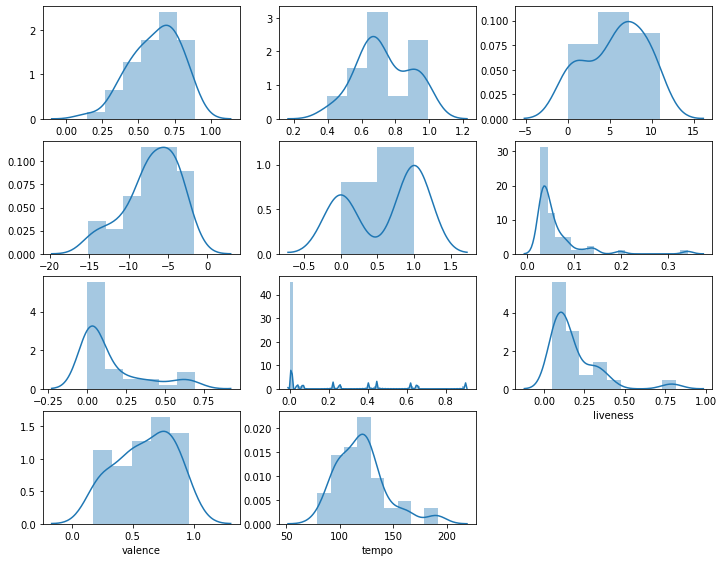

In [15]:
#import matplotlib.pyplot as plt
import math
columnNumber = 3
data_columns = dfmySongFeatsClean._get_numeric_data().columns.values
plot_columns = columnNumber
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(12, 12))
    
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i+1)
    snb.distplot(dfmySongFeatsClean[data_columns[i]], kde=True) 

In [ ]:
#evaluate training dataset
#based on valence and (danceability + energy)
moods = []


#insert into dataFrame
#result['analysisMood'] = mood

Pitch class
Pitch

class	Tonal counterparts	Solfege
0	C (also B♯, Ddouble flat)	do
1	C♯, D♭ (also Bdouble sharp)	
2	D (also Cdouble sharp, Edouble flat)	re
3	D♯, E♭ (also Fdouble flat)	
4	E (also Ddouble sharp, F♭)	mi
5	F (also E♯, Gdouble flat)	fa
6	F♯, G♭ (also Edouble sharp)	
7	G (also Fdouble sharp, Adouble flat)	sol
8	G♯, A♭	
9	A (also Gdouble sharp, Bdouble flat)	la
10, t or A	A♯, B♭ (also Cdouble flat)	
11, e or B	B (also Adouble sharp, C♭)	ti